## New RMS Calculation

In [1]:
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

###Single Example

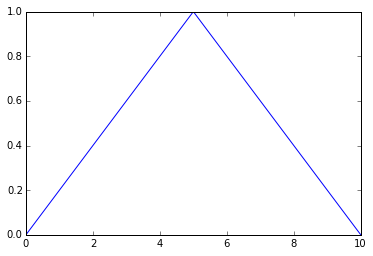

In [3]:
# Generate a signal with Spikes
tri = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1,0])
tri = tri/5.
plt.plot(tri)

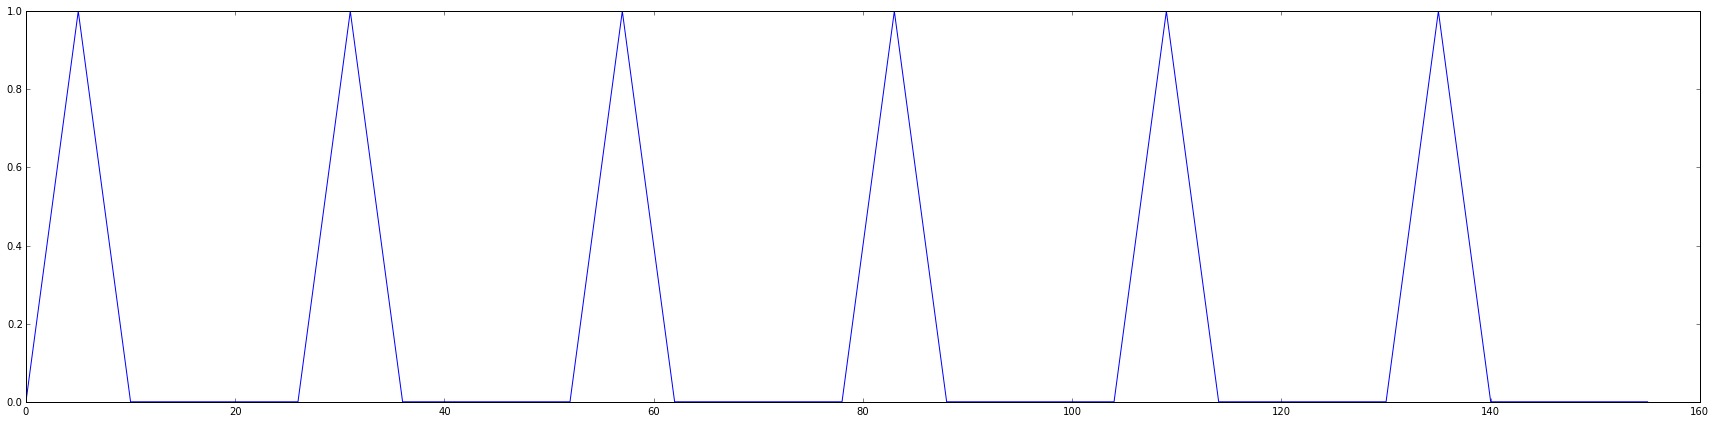

In [4]:
x = np.zeros(15)
data = np.append(tri,x)
for i in range (5):
    data = np.append(data,tri)
    data = np.append(data,x)
plt.figure(figsize =(30,7))
plt.plot(data)

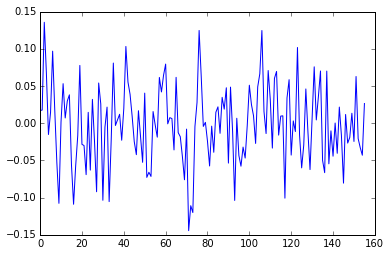

In [5]:
noise = np.random.normal(0, 0.05, len(data))
plt.plot(noise)

In [6]:
noised_data = data + noise

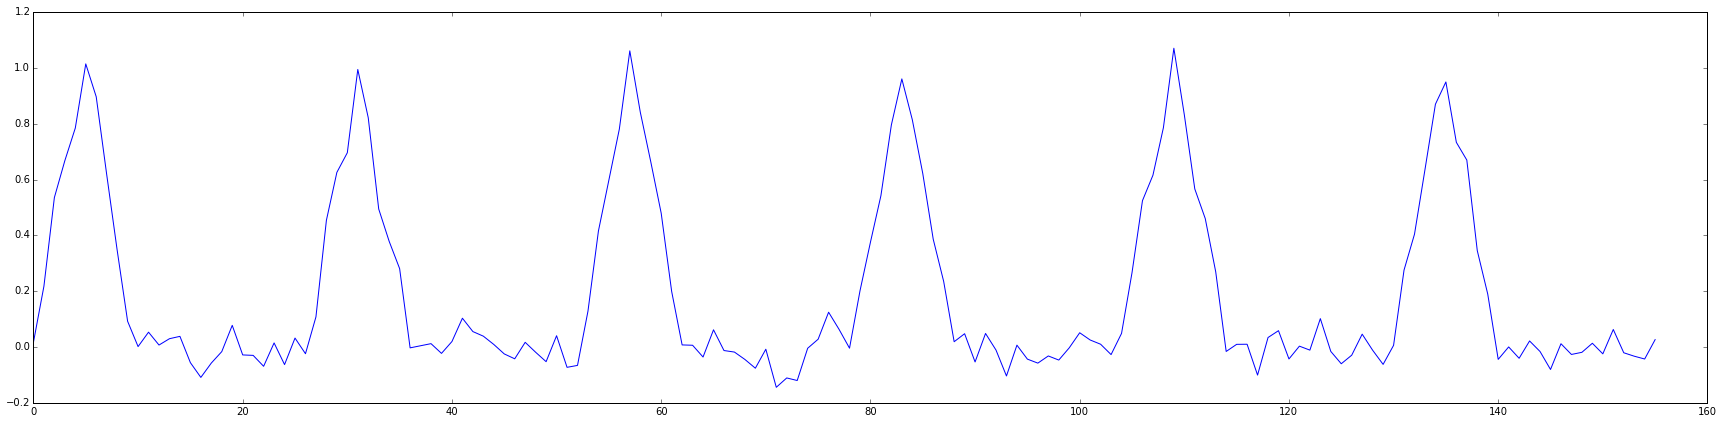

In [7]:
plt.figure(figsize=(30,7))
plt.plot(noised_data)

In [8]:
A_filt = medfilt(data,5)

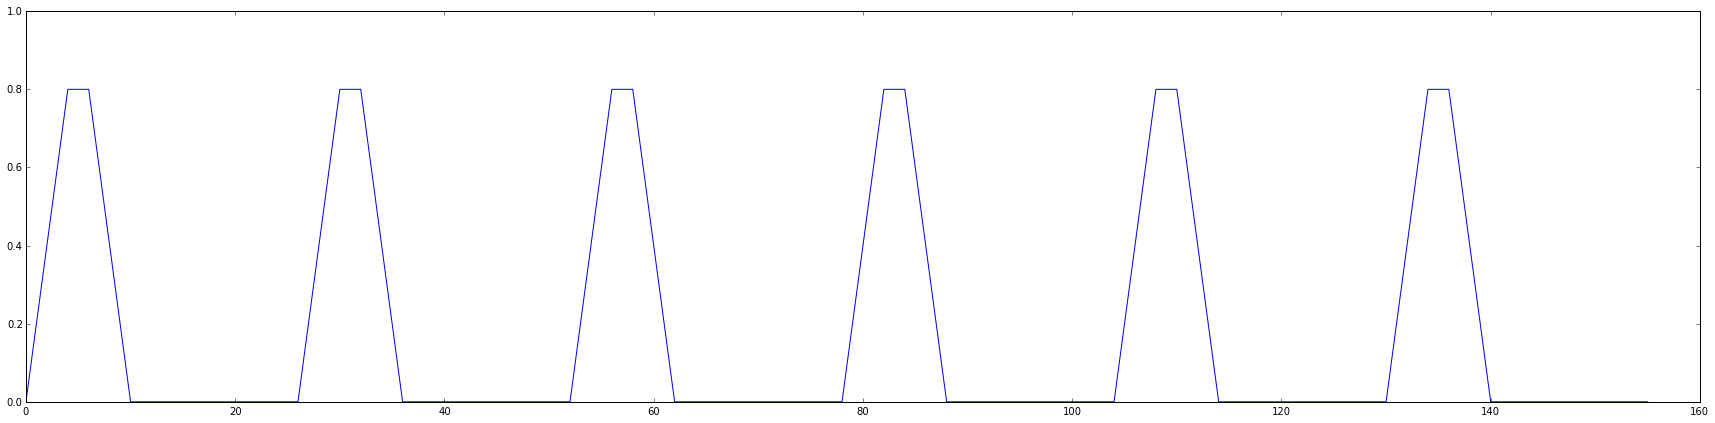

In [9]:
plt.figure(figsize=(30,7))
plt.ylim([0,1])
plt.plot(A_filt)

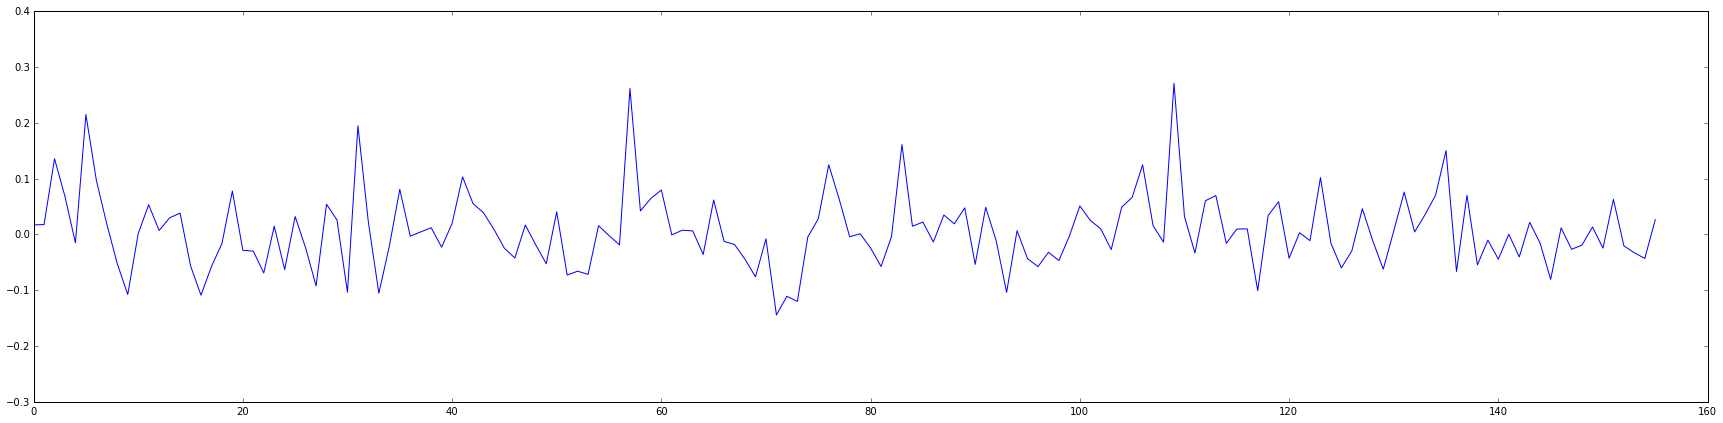

In [10]:
b_filt = noised_data - A_filt
plt.figure(figsize=(30,7))
plt.ylim([-0.3,0.4])
plt.plot(b_filt)

In [11]:
rms = np.sqrt(np.mean(np.square(b_filt)))
rms

0.066641721466045203

### Multiple Window lengths

In [12]:
wl = np.array([3, 5, 11, 15, 17, 21, 25, 31, 35, 39, 45, 47, 51, 55, 57, 61, 75])

In [13]:
filtered = np.zeros((140, len(data)))
filtered_spikes = np.zeros((140, len(data)))
rms = np.zeros(140)
values1 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered)):
        data1_noised = data + np.random.normal(0, 0.3, len(data))
        filtered[i,:] = medfilt(data, w)
        filtered_spikes[i,:] = noised_data - filtered[i,:]
        #rms[i] = np.sqrt(np.mean(np.square(filtered1[i,:])))
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values1[count] = mean 

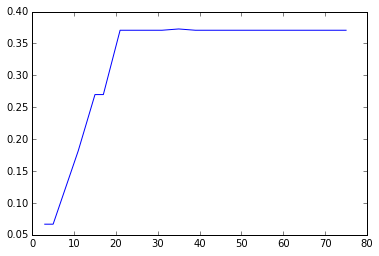

In [14]:
plt.plot(wl, values1)